In [5]:
import pandas as pd
df = pd.read_csv('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/startup_funding.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


## Find total number of fundings done in each year.
## Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
## Print year-wise total number of fundings also. Print years in ascending order.

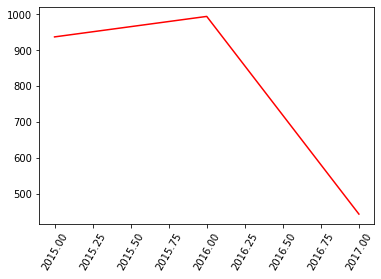

2015 936
2016 993
2017 443


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_yr(s): # s is string of form 01/08/2017
    return int(s[-4:])

df = pd.read_csv('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/startup_funding.csv')    
df['year'] = df.Date.apply(get_yr)
yr_count = df.year.value_counts()
#print(yr_count)

# By printing we get the data
yr = np.array([2015, 2016, 2017], dtype=int)
num_fundings = np.array([936, 993, 443], dtype=int)

plt.plot(yr,num_fundings,color='r')
plt.xticks(rotation=60)
plt.show()

for i in range(3):
    print(yr[i],num_fundings[i])

### Find out which cities are generally chosen for starting a startup.
### Find top 10 Indian cities which have most number of startups ?
### Plot a pie chart and visualise it.
### Print the city name and number of startups in that city also.


Note :
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the number of startups.

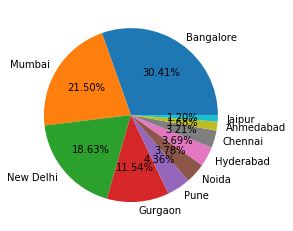

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def correct_city(s):
    l = s.split('/')
    city = l[0].strip()
    if city=='Delhi':
        return 'New Delhi'
    if city=='bangalore':
        return 'Bangalore'
    return city

df = pd.read_csv('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/startup_funding.csv') 
df.CityLocation.dropna(inplace=True) # drop rows having nan values in CityLocation column
# Make a new column of correct city names
df['city'] = df.CityLocation.apply(correct_city)
city_count = df.city.value_counts()

top_cities = np.array(city_count.index[:10])
num_startups = np.array(city_count.values[:10])

plt.pie(num_startups, labels=top_cities, autopct='%.2f%%')
plt.show()
for i in range(10):
    print(top_cities[i], num_startups[i])


### Find out if cities play any role in receiving funding.
### Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
### Print the city and percentage with 2 decimal place after rounding off.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/startup_funding.csv')

df = file.copy()

df['CityLocation'].dropna(inplace = True)

def doubleCity(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(doubleCity) #To make column of Indian cities only if more than 1 city is present

df['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
df['CityLocation'].replace("bangalore", "Bangalore", inplace = True)


df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','').fillna(0).astype(int)

investment = df.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending = False)
cities = investment[:10].index
invesment = investment[:10].values

count = np.array(invesment)

x = np.true_divide(count, count.sum(axis = 0, keepdims = True)) * 100


for i in range(len(cities)):
    print(cities[i], format(x[i], '.2f'))


Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


### There are 4 different type of investments. Find out percentage of amount funded for each investment type.
### Plot a pie chart to visualise.
### Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.

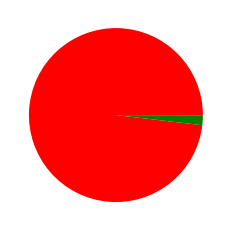

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

#df = pd.read_csv('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/startup_funding.csv') 
#df['InvestmentType'].unique() # Byt this we know various types 
#['Private Equity', 'Seed Funding', 'Debt Funding', nan,'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding']


inves_funds = {'Private Equity':0, 'Seed Funding':0, 'Debt Funding':0, 'Crowd Funding':0}
with open('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/startup_funding.csv', encoding='utf8') as obj:
    file_data = csv.DictReader(obj, skipinitialspace=True)
    for row in file_data:
        inves_type = row['InvestmentType']
        amt = row['AmountInUSD']
        if not pd.isnull(inves_type) and not pd.isnull(amt) and amt!='':
            amount = amt.replace(',','')
            amount = int(amount)
            
            if inves_type=='Private Equity' or inves_type=='PrivateEquity':
                inves_funds['Private Equity'] = inves_funds['Private Equity'] + amount
            if inves_type=='SeedFunding' or inves_type=='Seed Funding':
                inves_funds['Seed Funding'] = inves_funds['Seed Funding'] + amount
            if inves_type=='Crowd funding' or inves_type=='Crowd Funding':
                inves_funds['Crowd Funding'] = inves_funds['Crowd Funding'] + amount
            if inves_type=='Debt Funding':
                inves_funds['Debt Funding'] = inves_funds['Debt Funding'] + amount

#print(inves_funds.items())
#Create numpy arrays . Chk values by printing as above
types = np.array(list(inves_funds.keys()))
funds = np.array(list(inves_funds.values()))
total = np.sum(funds)

plt.pie(funds, colors=['red','green','blue','purple'])
plt.show()

for i in range(4):
    per = funds[i]*100/total
    print(types[i],format(per,'.2f'))
#df.head()

### Which type of companies got more easily funding. To answer this question, find -
### Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
### Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

Note :
Ecommerce is the right word in IndustryVertical, so correct it.
Print the industry in descending order with respect to the percentage of the amount funded.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

#df = pd.read_csv('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/startup_funding.csv') 
#df['IndustryVertical'].unique() # Byt this we know various types 

comp_funds = {}
with open('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/startup_funding.csv', encoding='utf8') as obj:
    file_data = csv.DictReader(obj, skipinitialspace=True)
    for row in file_data:
        comp_type = row['IndustryVertical']
        amt = row['AmountInUSD']
        if not pd.isnull(comp_type) and comp_type!='' and not pd.isnull(amt) and amt!='':
            amount = amt.replace(',','')
            amount = int(amount)
            
            if comp_type.lower() == 'ecommerce':
                req_comp = 'Ecommerce'
            else:
                req_comp = comp_type
            
            comp_funds[req_comp] = comp_funds.get(req_comp,0) + amount
            
arr = list(comp_funds.items())
arr.sort(key= lambda x:x[1])
req_arr = arr[::-1]
total = 0
for i in range(5):
    total = total + req_arr[i][1]

for i in range(5):
    per = req_arr[i][1]/total*100
    print(req_arr[i][0], format(per, '.2f'))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


### Find top 5 startups with most amount of total funding.
### Print the startup name in descending order with respect to amount of funding.
#### Note: Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

#df = pd.read_csv('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/startup_funding.csv') 
#df['StartupName'].unique() # Byt this we know various types 

startup_funds = {}
with open('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/startup_funding.csv', encoding='utf8') as obj:
    file_data = csv.DictReader(obj, skipinitialspace=True)
    for row in file_data:
        s_name = row['StartupName']
        amt = row['AmountInUSD']
        if not pd.isnull(s_name) and s_name!='' and not pd.isnull(amt) and amt!='': # pd.isnull() -> chk nan value
            amount = amt.replace(',','')
            amount = int(amount)
            
            lwr_str = s_name.lower()
            l1 = lwr_str.split() # to chk against oyo rooms
            l2 = lwr_str.split('.') # To chk against flipkart.com
            
            #if 'ola' in s_name.lower(): # can't do like that bcz it will also include startups like kolabro which is not ola
            
            if 'olacabs' in l1 or 'ola' in l2 or 'olacabs' in l1:
                req_startup = 'Ola'
            elif 'flipkart' in l1 or 'flipkart' in l2:
                req_startup = 'Flipkart'
            elif 'oyo' in l1 or 'oyo' in l2 or 'oyorooms' in l1:
                req_startup = 'Oyo'
            elif 'paytm' in l1 or 'paytm' in l2:
                req_startup = 'Paytm'
            else:
                req_startup = s_name
            
            startup_funds[req_startup] = startup_funds.get(req_startup,0) + amount
            
arr = list(startup_funds.items())
arr.sort(key= lambda x:x[1])
req_arr = arr[::-1]
total = 0
for i in range(5):
    total = total + req_arr[i][1]

for i in range(5):
    per = req_arr[i][1]/total*100
    print(req_arr[i][0])

Paytm
Flipkart
Ola
Snapdeal
Oyo


### Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
### Print the startup name in descending order with respect to the number of funding round as integer value.
#### Note:  Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

#df = pd.read_csv('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/startup_funding.csv') 
#df['StartupName'].unique() # Byt this we know various types 

startup_funds = {}
with open('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/startup_funding.csv', encoding='utf8') as obj:
    file_data = csv.DictReader(obj, skipinitialspace=True)
    for row in file_data:
        s_name = row['StartupName']
        if not pd.isnull(s_name) and s_name!='': # pd.isnull() -> chk nan value
            lwr_str = s_name.lower()
            l1 = lwr_str.split() # to chk against oyo rooms
            l2 = lwr_str.split('.') # To chk against flipkart.com
            
            #if 'ola' in s_name.lower(): # can't do like that bcz it will also include startups like kolabro which is not ola
            
            if 'ola' in l1 or 'ola' in l2 or 'olacabs' in l1:
                req_startup = 'Ola'
            elif 'flipkart' in l1 or 'flipkart' in l2:
                req_startup = 'Flipkart'
            elif 'oyo' in l1 or 'oyo' in l2 or 'oyorooms' in l1:
                req_startup = 'Oyo'
            elif 'paytm' in l1 or 'paytm' in l2:
                req_startup = 'Paytm'
            elif 'snapdeal' in l1 or 'snapdeal' in l2:
                req_startup = 'Snapdeal'
            elif 'urbanclap' in l1 or 'urbanclap' in l2:
                req_startup = 'UrbanClap'
            elif 'jugnoo' in l1 or 'jugnoo' in l2:
                req_startup = 'Jugnoo'
            else:
                req_startup = s_name
            
            startup_funds[req_startup] = startup_funds.get(req_startup,0) + 1
            
arr = list(startup_funds.items())
arr.sort(key= lambda x:x[1])
req_arr = arr[::-1]
total = 0
for i in range(5):
    total = total + req_arr[i][1]

for i in range(5):
    per = req_arr[i][1]/total*100
    print(req_arr[i][0], req_arr[i][1])

Ola 9
Swiggy 7
Oyo 6
Paytm 6
UrbanClap 6


### Find the Investors who have invested maximum number of times.
### Print the investor name and number of times invested as integer value.
#### Note: In startup, multiple investors might have invested. So consider each investor for that startup.
#### Ignore the undisclosed investors.

In [35]:
import pandas as pd
import numpy as np
import csv

invest_count = {}
max_time = 0
with open('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/startup_funding.csv', encoding='utf8') as obj:
    file_data = csv.DictReader(obj, skipinitialspace=True)
    for row in file_data:
        investors = row['InvestorsName']
        if not pd.isnull(investors):
            inves_list = [investr.strip() for investr in investors.split(',')]
            for i in inves_list:
                invest_count[i] = invest_count.get(i,0)+1
                if invest_count[i] > max_time :
                    max_time = invest_count[i]
                    max_investor_name = i
print(max_investor_name, max_time)

Sequoia Capital 64
